In [1]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [27]:
data = pd.read_csv('stock2.csv')

In [28]:
data

,date,1. open,2. high,3. low,4. close,5. volume
0,2025-05-19,164.510,166.640,164.2200,166.540,30564635.0
1,2025-05-16,167.725,169.350,165.6200,166.190,42846925.0
2,2025-05-15,165.840,166.205,162.3732,163.960,33146669.0
3,2025-05-14,159.960,167.000,159.6100,165.370,48755869.0
4,2025-05-13,158.790,160.570,156.1600,159.530,42382126.0
...,...,...,...,...,...,...
5216,2004-08-25,104.760,108.000,103.8800,106.000,9188600.0
5217,2004-08-24,111.240,111.600,103.5700,104.870,15247300.0
5218,2004-08-23,110.760,113.480,109.0500,109.400,18256100.0
5219,2004-08-20,101.010,109.080,100.5000,108.310,22834300.0


In [29]:
data = data.drop(columns = ['5. volume'])

In [30]:
data

,date,1. open,2. high,3. low,4. close
0,2025-05-19,164.510,166.640,164.2200,166.540
1,2025-05-16,167.725,169.350,165.6200,166.190
2,2025-05-15,165.840,166.205,162.3732,163.960
3,2025-05-14,159.960,167.000,159.6100,165.370
4,2025-05-13,158.790,160.570,156.1600,159.530
...,...,...,...,...,...
5216,2004-08-25,104.760,108.000,103.8800,106.000
5217,2004-08-24,111.240,111.600,103.5700,104.870
5218,2004-08-23,110.760,113.480,109.0500,109.400
5219,2004-08-20,101.010,109.080,100.5000,108.310


In [39]:
data['year'] = data['date'].str.split('-').str[0]
data['month'] = data['date'].str.split('-').str[1]
data['date'] = data['date'].str.split('-').str[2]

In [40]:
data['date']

0       19
1       16
2       15
3       14
4       13
        ..
5216    25
5217    24
5218    23
5219    20
5220    19
Name: date, Length: 5221, dtype: object

In [41]:
data

,date,1. open,2. high,3. low,4. close,year,month
0,19,164.510,166.640,164.2200,166.540,2025,05
1,16,167.725,169.350,165.6200,166.190,2025,05
2,15,165.840,166.205,162.3732,163.960,2025,05
3,14,159.960,167.000,159.6100,165.370,2025,05
4,13,158.790,160.570,156.1600,159.530,2025,05
...,...,...,...,...,...,...,...
5216,25,104.760,108.000,103.8800,106.000,2004,08
5217,24,111.240,111.600,103.5700,104.870,2004,08
5218,23,110.760,113.480,109.0500,109.400,2004,08
5219,20,101.010,109.080,100.5000,108.310,2004,08


In [42]:
data.shape

(5221, 7)

In [43]:
data.describe()

,1. open,2. high,3. low,4. close
count,5221.000000,5221.000000,5221.000000,5221.000000
mean,765.387872,773.019525,757.366410,765.329383
std,612.995953,619.117326,606.462026,612.920707
min,85.400000,86.520000,83.340000,83.430000
25%,401.580000,406.000000,394.660000,400.210000
50%,586.140000,589.330000,579.300000,584.560000
75%,1001.910000,1008.650000,994.250000,1003.880000
max,3025.000000,3030.931500,2977.980000,2996.770000


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5221 entries, 0 to 5220
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      5221 non-null   object 
 1   1. open   5221 non-null   float64
 2   2. high   5221 non-null   float64
 3   3. low    5221 non-null   float64
 4   4. close  5221 non-null   float64
 5   year      5221 non-null   object 
 6   month     5221 non-null   object 
dtypes: float64(4), object(3)
memory usage: 285.7+ KB


In [46]:
data['date'] = data['date'].astype(int)
data['month'] = data['month'].astype(int)
data['year'] = data['year'].astype(int)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5221 entries, 0 to 5220
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      5221 non-null   int64  
 1   1. open   5221 non-null   float64
 2   2. high   5221 non-null   float64
 3   3. low    5221 non-null   float64
 4   4. close  5221 non-null   float64
 5   year      5221 non-null   int64  
 6   month     5221 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 285.7 KB


In [48]:
data.describe()

,date,1. open,2. high,3. low,4. close,year,month
count,5221.000000,5221.000000,5221.000000,5221.000000,5221.000000,5221.000000,5221.000000
mean,15.733959,765.387872,773.019525,757.366410,765.329383,2014.497989,6.546447
std,8.755026,612.995953,619.117326,606.462026,612.920707,6.001584,3.445081
min,1.000000,85.400000,86.520000,83.340000,83.430000,2004.000000,1.000000
25%,8.000000,401.580000,406.000000,394.660000,400.210000,2009.000000,4.000000
50%,16.000000,586.140000,589.330000,579.300000,584.560000,2014.000000,7.000000
75%,23.000000,1001.910000,1008.650000,994.250000,1003.880000,2020.000000,10.000000
max,31.000000,3025.000000,3030.931500,2977.980000,2996.770000,2025.000000,12.000000


<Axes: >

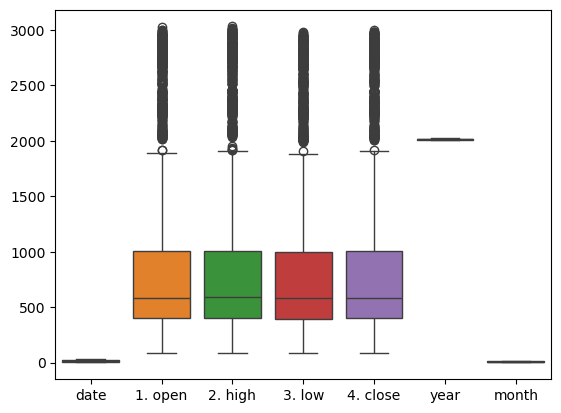

In [54]:
sns.boxplot(data)

In [49]:
x = data.drop(columns = ['4. close'])
y = data['4. close']

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 0)

In [53]:
from sklearn.preprocessing import StandardScaler

In [55]:
sc = StandardScaler()
sc.fit(x_train)

x_train_scaled = sc.transform(x_train)
x_test_scaled = sc.transform(x_test)

In [56]:
x_train_scaled

array([[ 0.49593475, -0.75783517, -0.75443248, -0.75421494, -1.59443135,
         0.70712996],
       [-0.64890964, -0.24253802, -0.24568473, -0.23928731, -1.259201  ,
         0.99694983],
       [ 0.9538725 , -0.99180405, -0.99407083, -0.99309429,  1.59025703,
         0.70712996],
       ...,
       [ 0.26696587,  0.5889735 ,  0.57423772,  0.53671525,  0.58456596,
         0.99694983],
       [-1.1068474 , -0.40742134, -0.41474408, -0.42314872,  0.08172043,
        -1.61142904],
       [-0.76339408, -0.31186879, -0.31297188, -0.30506425, -0.08589475,
         0.12749021]])

In [57]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [58]:
x_train_scaled

,date,1. open,2. high,3. low,year,month
0,0.495935,-0.757835,-0.754432,-0.754215,-1.594431,0.707130
1,-0.648910,-0.242538,-0.245685,-0.239287,-1.259201,0.996950
2,0.953873,-0.991804,-0.994071,-0.993094,1.590257,0.707130
3,1.640779,-0.139743,-0.145822,-0.134540,-0.421125,0.417310
4,1.297326,0.853807,0.835991,0.832083,0.919796,-0.741969
...,...,...,...,...,...,...
4171,-0.534425,-0.749645,-0.752248,-0.754826,-1.594431,0.996950
4172,0.953873,-0.262482,-0.267952,-0.268923,-0.421125,-0.452150
4173,0.266966,0.588973,0.574238,0.536715,0.584566,0.996950
4174,-1.106847,-0.407421,-0.414744,-0.423149,0.081720,-1.611429


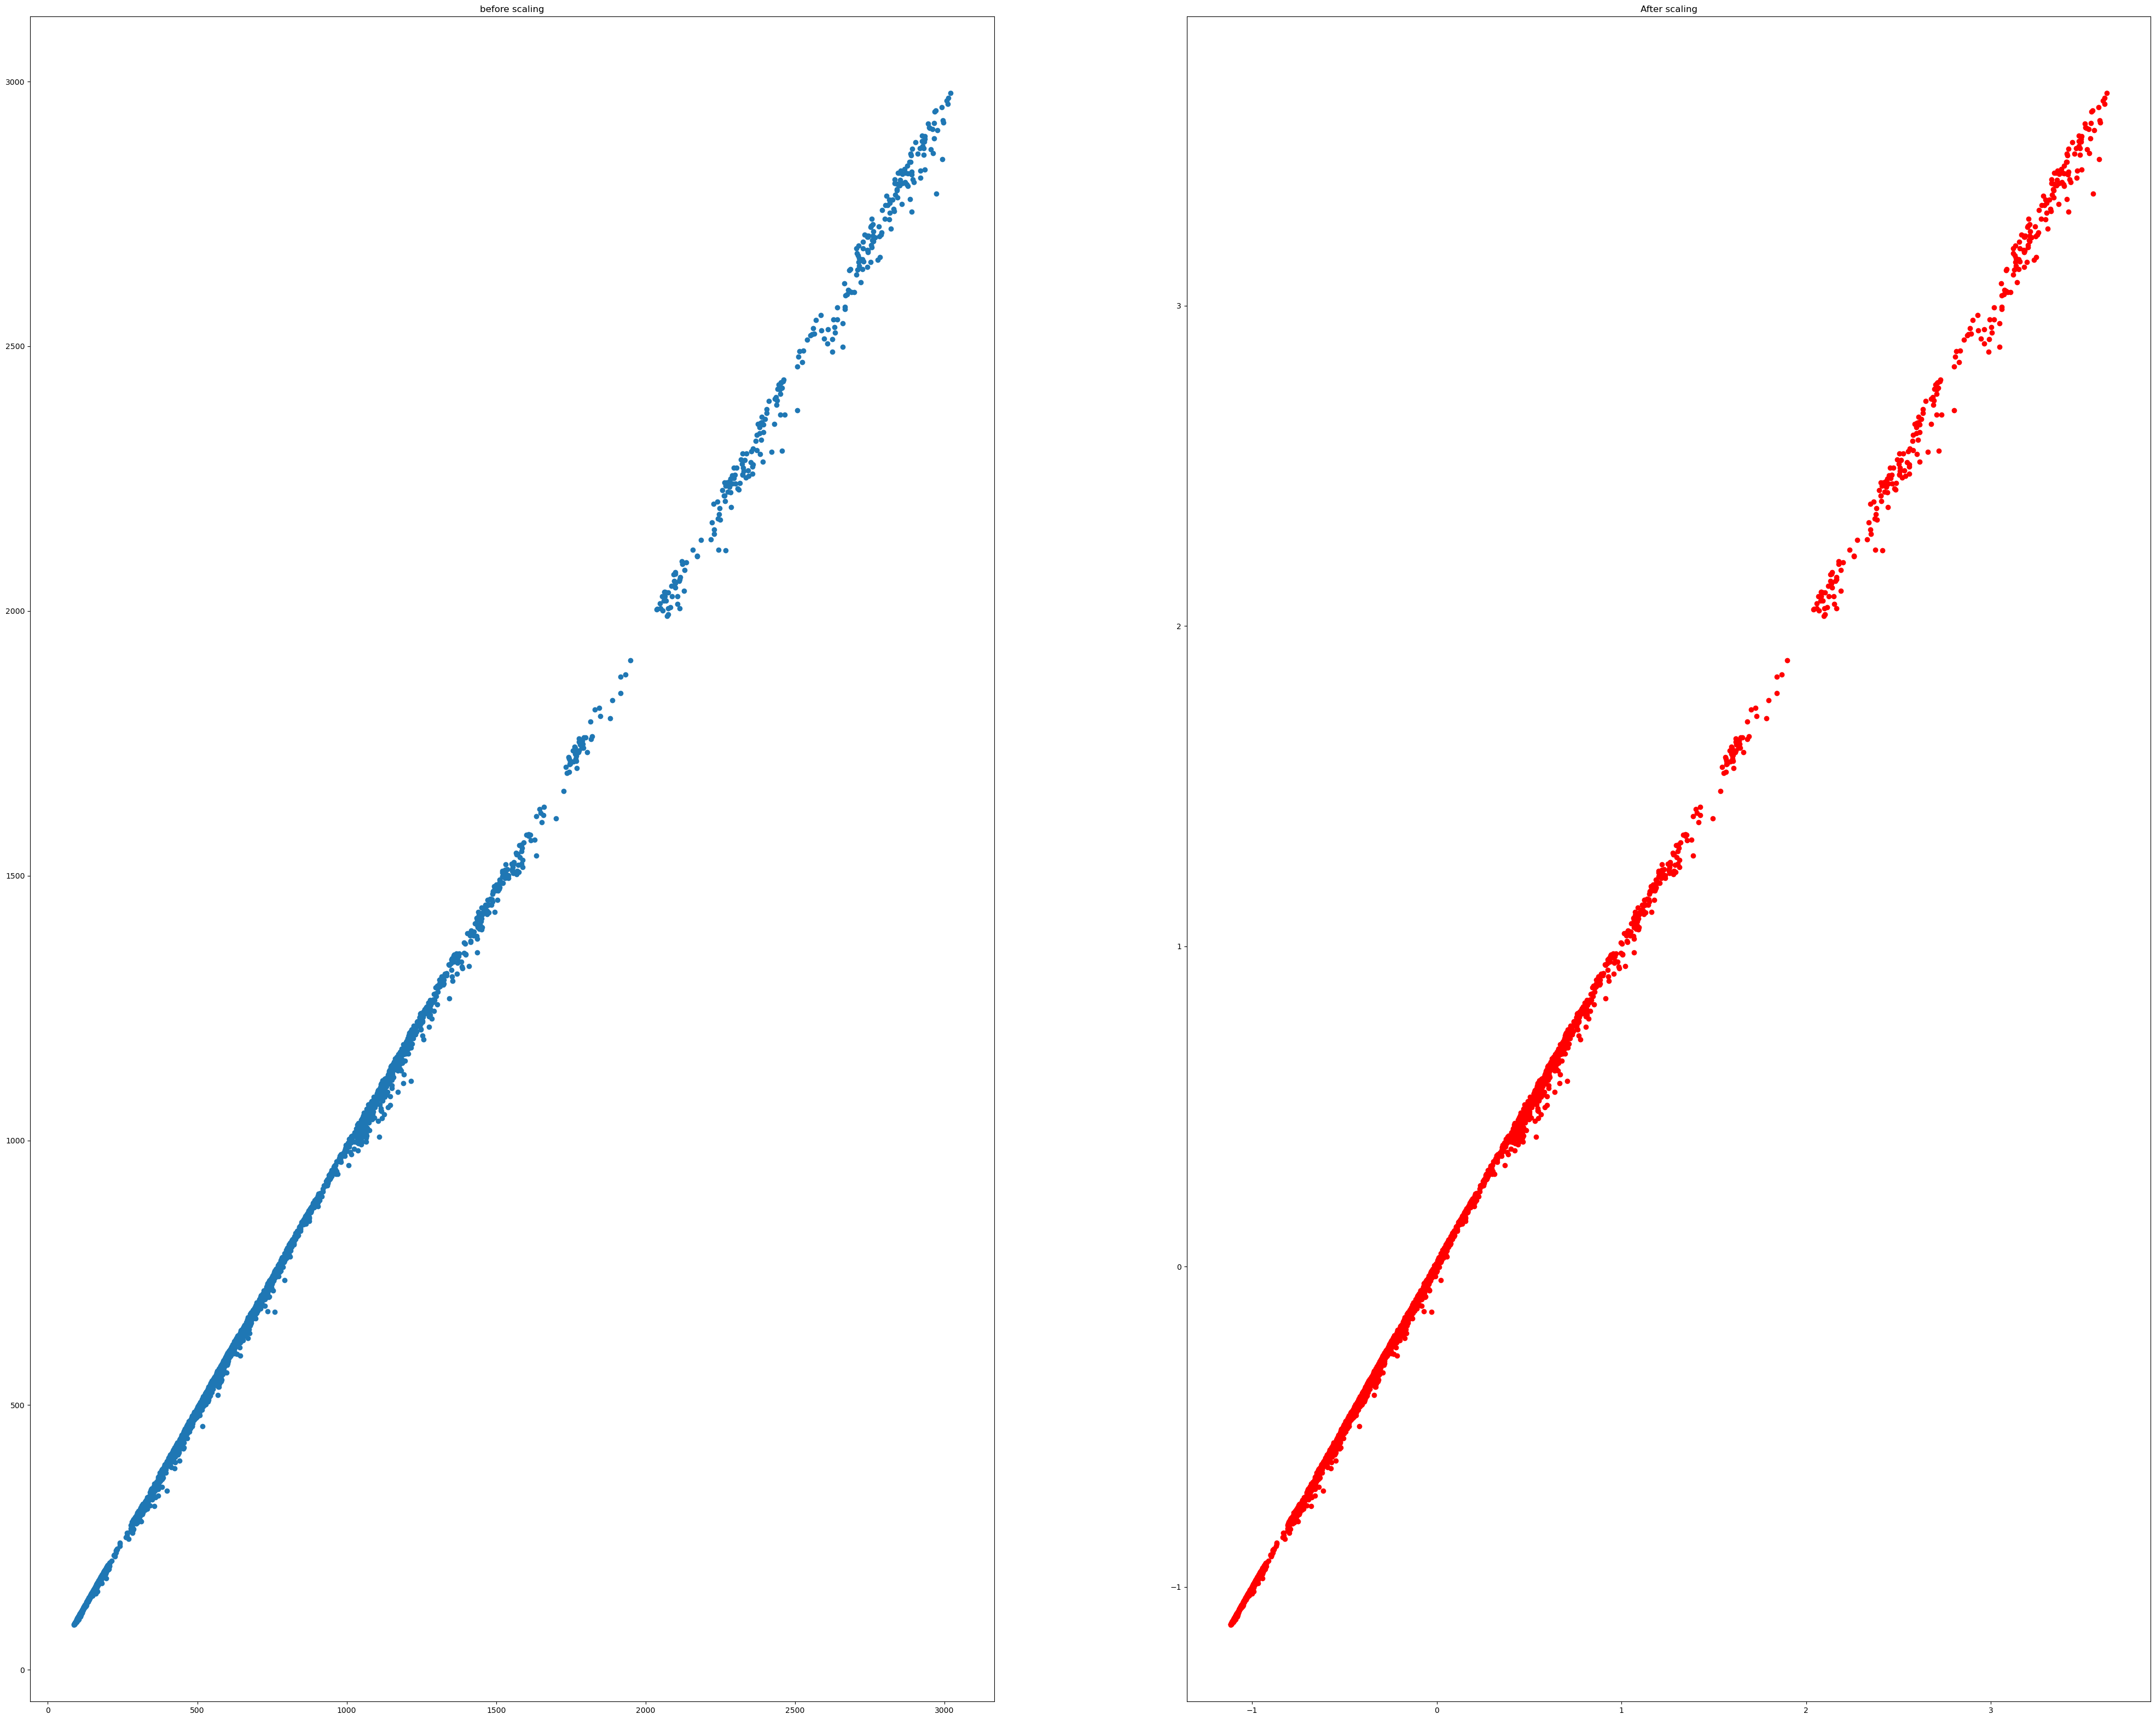

In [71]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (50,40))
ax1.scatter(x_train['2. high'],x_train['3. low'])
ax1.set_title('before scaling')
ax2.scatter(x_train_scaled['2. high'],x_train_scaled['3. low'],color = 'red')
ax2.set_title('After scaling')
plt.show()

In [72]:
from sklearn.linear_model import LinearRegression

In [74]:
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [75]:
y_pred = lr.predict(x_test_scaled)

In [80]:
from sklearn.metrics import r2_score

In [81]:
score = r2_score(y_test,y_pred)

In [82]:
print(score)

0.9999263331843086


Text(0.5, 1.0, 'Actual vs Predicted')

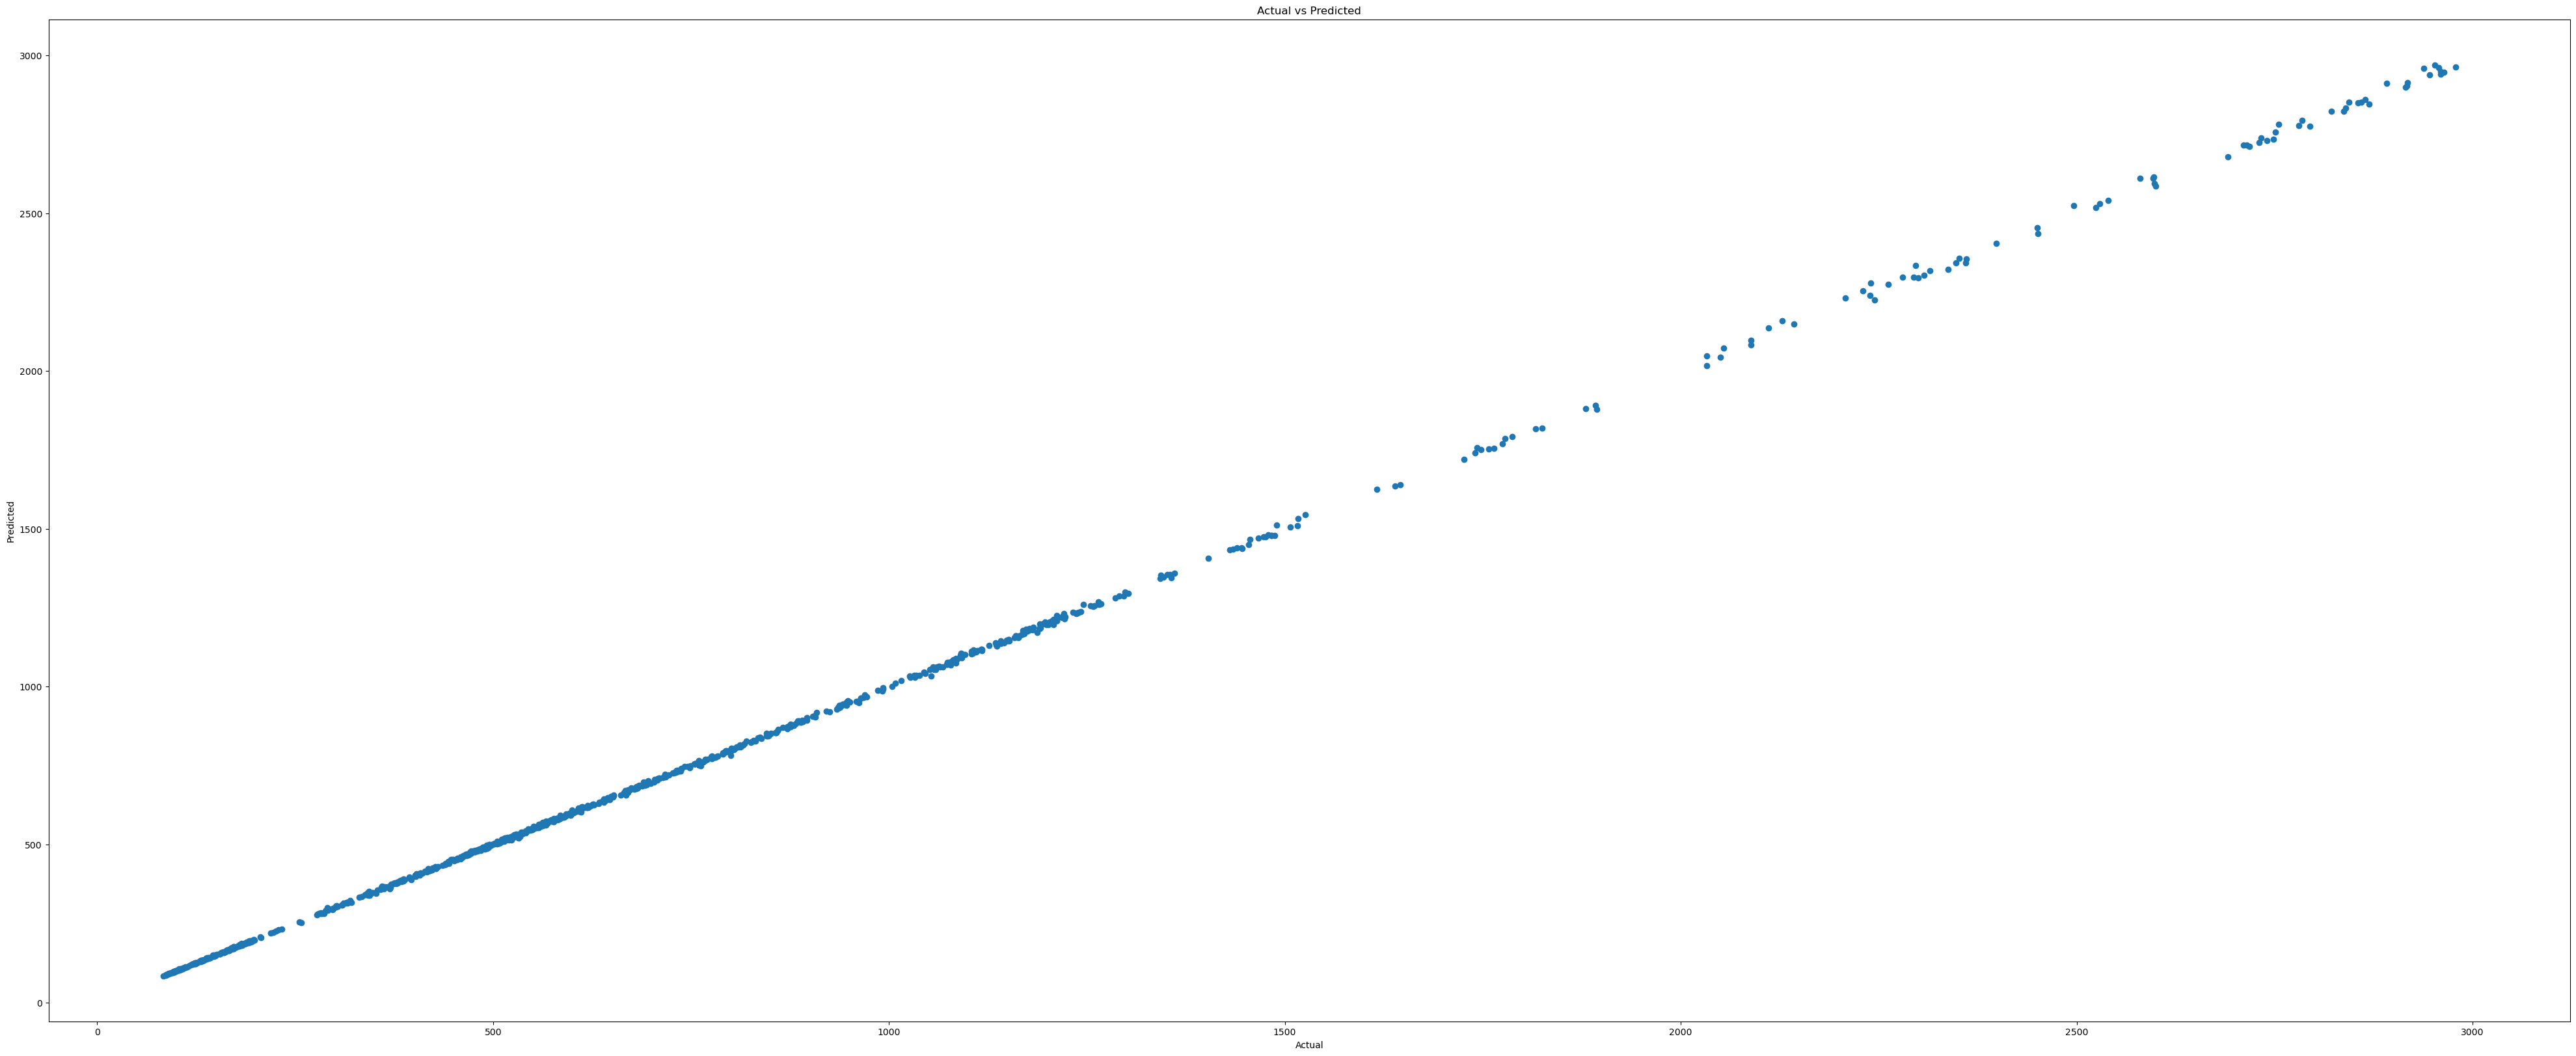

In [99]:
plt.figure(figsize = (50,20))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

Text(0.5, 1.0, 'residual_plot')

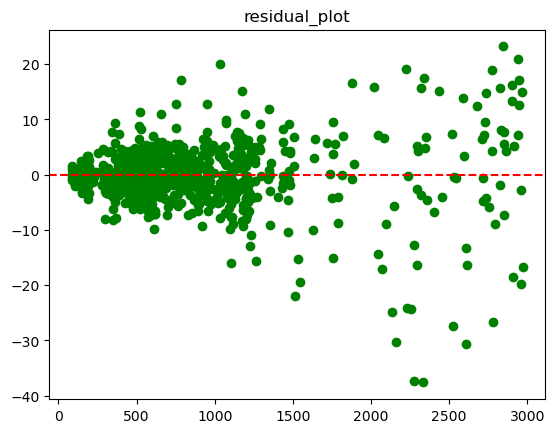

In [104]:
residuals = y_test - y_pred
plt.scatter(y_pred,residuals,color = 'green')
plt.axhline(0,color = 'red',linestyle = '--')
plt.title('residual_plot')

<Axes: xlabel='4. close', ylabel='Count'>

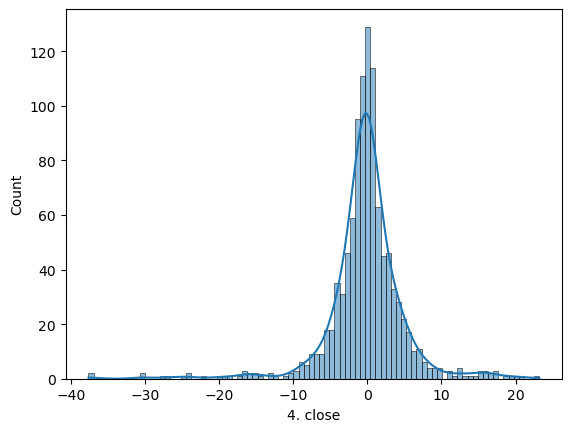

In [106]:
sns.histplot(residuals,kde = True)